In [106]:
import pandas as pd 
import os 
from modules.plotting import plot_bar
import numpy as np  
import matplotlib.pyplot as plt

fp = os.path.join('data', 'results','DEEP_Cleaned_Survey_Responses_S1.csv')
df = pd.read_csv(fp, index_col=0)
display(df.head())

,Respondent ID,Collector ID,Start Date,End Date,IP Address,language,total_time,How did you learn about the survey?_Response,How did you learn about the survey?_Other,Are you taking this survey online or in person?_Response,...,What industries are people where you live primarily working in? Select up to 3._Transportation,What industries are people where you live primarily working in? Select up to 3._Other,How do people in your community usually hear about job opportunities?_Word of mouth,How do people in your community usually hear about job opportunities?_Online job site,How do people in your community usually hear about job opportunities?_Delaware JobLink,How do people in your community usually hear about job opportunities?_Job Fairs,How do people in your community usually hear about job opportunities?_Employer websites,How do people in your community usually hear about job opportunities?_Temp Agency,How do people in your community usually hear about job opportunities?_I don't know,How do people in your community usually hear about job opportunities?_Other
1,1.185240e+11,452261040.0,01/29/2024 12:51:19 PM,01/29/2024 01:02:56 PM,50.254.172.169,en,697.0,Ci'Aira,NaN,In person,...,0,NaN,0,1,0,0,1,0,0,NaN
2,1.185239e+11,452261040.0,01/29/2024 10:36:37 AM,01/29/2024 10:47:25 AM,73.165.183.94,en,648.0,Michael,NaN,In person,...,0,NaN,1,0,1,0,0,1,0,NaN
3,1.185239e+11,452261040.0,01/29/2024 10:24:19 AM,01/29/2024 10:35:04 AM,73.165.183.94,en,644.0,Michael,NaN,In person,...,0,NaN,0,0,1,0,0,0,0,NaN
4,1.185234e+11,452261040.0,01/28/2024 04:12:16 PM,01/28/2024 04:33:43 PM,73.165.183.94,en,1286.0,Michael,NaN,In person,...,1,NaN,0,0,0,0,0,1,0,NaN
5,1.185215e+11,452261040.0,01/25/2024 11:51:15 AM,01/25/2024 12:13:25 PM,167.21.141.30,en,1330.0,"Other (please specify event name, if applicable)",Brad Haley,Online,...,0,NaN,1,1,1,1,1,1,0,NaN


### Educational Attainment  

What is the highest level of education that you have attained?_Response
High school diploma                66
Master's or higher degree          58
Bachelor's degree                  45
Some college, no degree            41
Associate's degree                 26
Some high school, no diploma       20
GED                                17
Currently attending high school    15
Name: count, dtype: int64

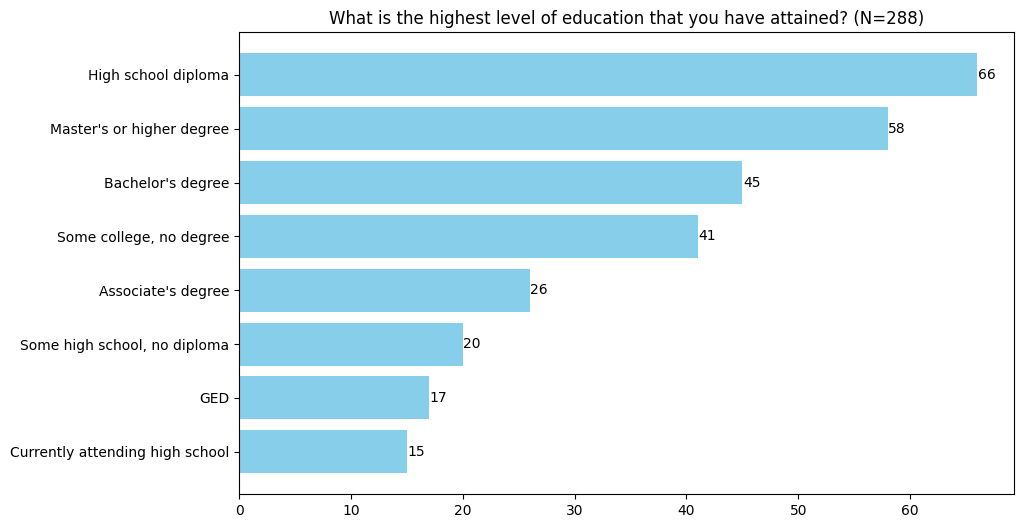

Count Column: 288


,What Is The Highest Level Of Education That You Have Attained? Response,Count
1,High school diploma,66
2,Master's or higher degree,58
3,Bachelor's degree,45
4,"Some college, no degree",41
5,Associate's degree,26
6,"Some high school, no diploma",20
7,GED,17
8,Currently attending high school,15


In [176]:
edu_level_q ='What is the highest level of education that you have attained?_Response'
data = df[edu_level_q].value_counts()
n_non_nan = df[~df[edu_level_q].isna()].shape[0]
title = edu_level_q.rstrip('_Response') + f' (N={n_non_nan})'
display(data)
plot_bar(data, title=title)

/var/folders/qy/qp1k23kj0jj0bpkn10sx9mhh0000gn/T/ipykernel_27180/3041472020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_college[edu_level_q].fillna('Unspecified', inplace=True)
/var/folders/qy/qp1k23kj0jj0bpkn10sx9mhh0000gn/T/ipykernel_27180/3041472020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_college['higher_ed'] = np.where(df_college[edu_level_q].isin(["Master's or higher degree", "Bachelor's degree", "Associate's degree"]), "Degree", "No Degree")
/var/folders/qy/qp1k23kj0jj0bpkn10sx9mhh0000gn/T/ipykernel_27180/3041472020.py:5: SettingWi

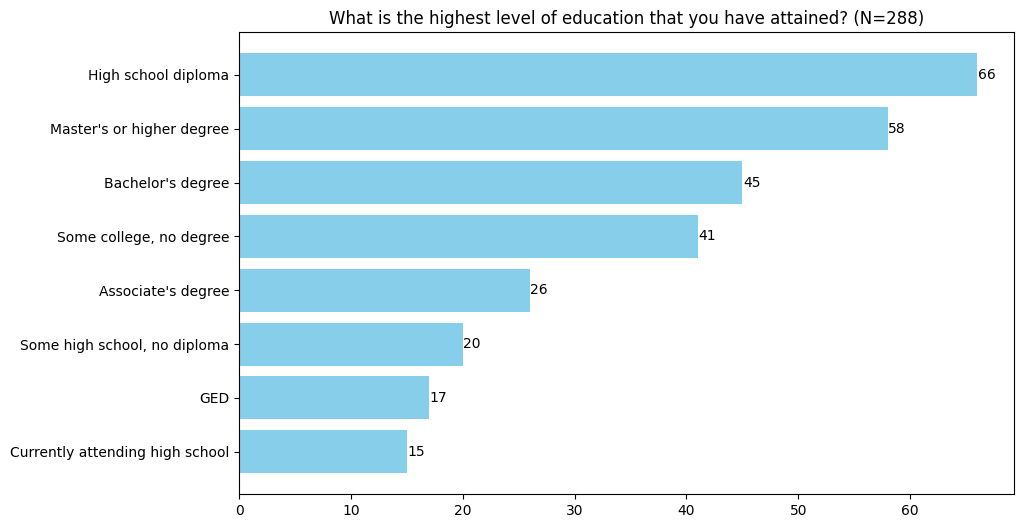

Count Column: 288


,What Is The Highest Level Of Education That You Have Attained? Response,Count
1,High school diploma,66
2,Master's or higher degree,58
3,Bachelor's degree,45
4,"Some college, no degree",41
5,Associate's degree,26
6,"Some high school, no diploma",20
7,GED,17
8,Currently attending high school,15


In [183]:
df_college = df[['Respondent ID', edu_level_q]]
df_college[edu_level_q].fillna('Unspecified', inplace=True)

df_college['higher_ed'] = np.where(df_college[edu_level_q].isin(["Master's or higher degree", "Bachelor's degree", "Associate's degree"]), "Degree", "No Degree")
df_college['higher_ed'] = np.where(df_college[edu_level_q] == 'Unspecified', 'Unspecified',df_college['higher_ed'])

# Drop nans
df_college_non_nan = df_college[df_college[edu_level_q] != 'Unspecified']

df_respondent_by_edu_level_counts = df_college_non_nan['higher_ed'].value_counts()
df_respondent_by_edu_level_counts = df_college_non_nan[edu_level_q].value_counts()

title = edu_level_q.rstrip('_Response') +f" (N={df_college_non_nan.shape[0]})"

plot_bar(df_respondent_by_edu_level_counts, title=title)

In [227]:
df_respondent_by_edu_level_counts = df_respondent_by_edu_level_counts.reset_index()

In [230]:
total = df_respondent_by_edu_level_counts['count'].sum()
print(total)
df_respondent_by_edu_level_counts['pct'] = df_respondent_by_edu_level_counts['count'].apply(lambda x: np.round(x / total, 2))
df_respondent_by_edu_level_counts

288


,What is the highest level of education that you have attained?_Response,count,pct
0,High school diploma,66,0.23
1,Master's or higher degree,58,0.20
2,Bachelor's degree,45,0.16
3,"Some college, no degree",41,0.14
4,Associate's degree,26,0.09
5,"Some high school, no diploma",20,0.07
6,GED,17,0.06
7,Currently attending high school,15,0.05


##### Education & Desired Skills

In [188]:
## Desired skills 
desired_skills_fp = os.path.join('data', 'manual_categories', 'open', "What skills would you most like to develop?_n=210.csv")

df_desired_skills = pd.read_csv(desired_skills_fp, index_col=0).set_index(['Respondent ID'])
joined = df_college_non_nan.merge(df_desired_skills, how='left', left_on='Respondent ID', right_index=True)

In [189]:
## What percentage of degree vs non-degree holders listed soft skills as their most-desired skill? 

## What percentage "" by degree type 

## Percentage breakdown of those who said they listed soft-skills as their most-desired skill 
df_want_soft_skills = joined[joined['category'] == 'Communication & Soft Skills']
n_want_soft_skills = df_want_soft_skills.shape[0]

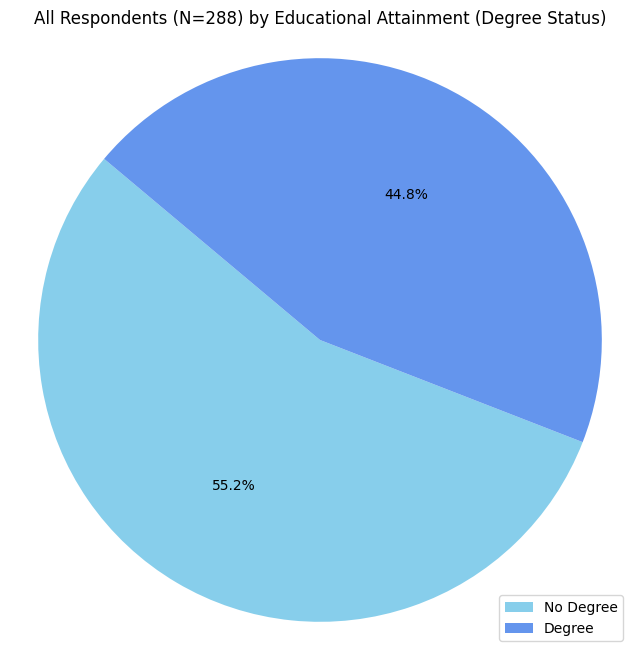

,Degree Status,Count
0,No Degree,159
1,Degree,129


In [209]:
title = f'All Respondents (N={joined.shape[0]}) by Educational Attainment (Degree Status)'

data = joined['higher_ed'].value_counts().reset_index()
data['pct'] = data['count'].apply(lambda x: (x / n_want_soft_skills))

plt.figure(figsize=(8, 8))
plt.pie(x=data['pct'].values, labels=None, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'cornflowerblue'])
plt.legend(data['higher_ed'], loc="lower right")
plt.axis('equal')
plt.title(title)
plt.show()

data_to_display = data.rename({"higher_ed":"Degree Status", 'count':'Count'}, axis=1)
data_to_display[['Degree Status', 'Count']]


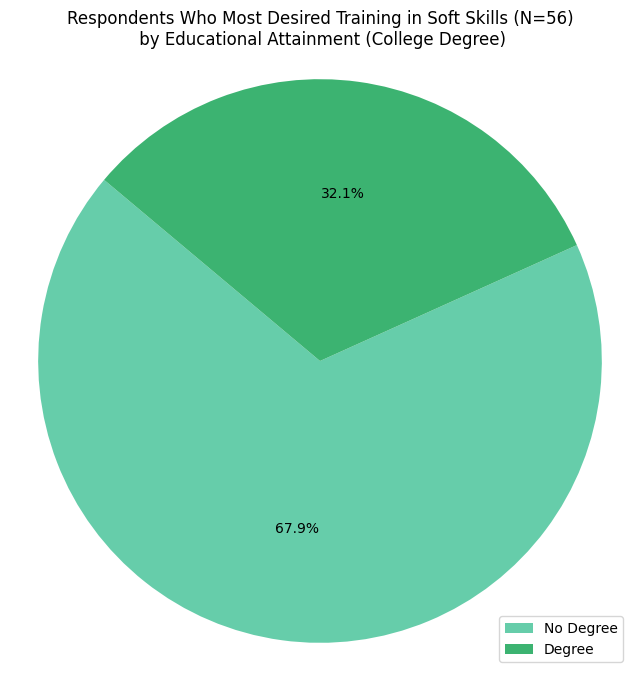

,Degree Status,Count
0,No Degree,38
1,Degree,18


In [215]:
title = f'Respondents Who Most Desired Training in Soft Skills (N={n_want_soft_skills})\n by Educational Attainment (College Degree)'

data = df_want_soft_skills['higher_ed'].value_counts().reset_index()
data['pct'] = data['count'].apply(lambda x: (x / n_want_soft_skills))

plt.figure(figsize=(8, 8))
plt.pie(x=data['pct'].values, labels=None, autopct='%1.1f%%', startangle=140, colors=['mediumaquamarine', 'mediumseagreen'])
plt.legend(data['higher_ed'], loc="lower right")
plt.axis('equal')
plt.title(title)
plt.show()

data_to_display = data.rename({"higher_ed":"Degree Status", 'count':'Count'}, axis=1)
data_to_display[['Degree Status', 'Count']]

In [362]:
from scipy.stats import chi2_contingency

title = 'Chi Square Test (Preference for Communication & Soft Skills, By Degree Status)'
print(title)

data = joined.copy()
ss = 'Communication & Soft Skills'
data['Skill Preference'] = np.where(data['category'] != ss, 'Other Skill', ss)
contingency_table = pd.crosstab(data['higher_ed'], data['Skill Preference'])

display(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)

 
print("Chi-square statistic:", chi2)
print("P-value:", p) 
# 0.04871529573006351 is *technically* below .05 but I would not be confident here 
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi Square Test (Preference for Communication & Soft Skills, By Degree Status)


Skill Preference,Communication & Soft Skills,Other Skill
higher_ed,,
Degree,18,111
No Degree,38,121


Chi-square statistic: 3.8851367270667923
P-value: 0.04871529573006351
Degrees of freedom: 1
Expected frequencies table:
[[ 25.08333333 103.91666667]
 [ 30.91666667 128.08333333]]


In [240]:
desired_skills_q = 'What skills would you most like to develop?_Open'
v_counts = joined.groupby(edu_level_q)['category'].value_counts().reset_index(['category'])
df_desired_skills_edu_level = pd.pivot(v_counts, columns=['category'], values=['count']).fillna(0)
df_desired_skills_edu_level.columns = [col[1] for col in df_desired_skills_edu_level.columns]
df_desired_skills_edu_level['n_deg_level'] = df_desired_skills_edu_level.sum(axis=1)
for col in df_desired_skills_edu_level.columns[:-1]: 
    df_desired_skills_edu_level[f'{col}_pct'] = (df_desired_skills_edu_level[col] / df_desired_skills_edu_level['n_deg_level']).round(2)

(df_desired_skills_edu_level.filter(regex='pct|n_deg'))

,n_deg_level,Business & Management_pct,Communication & Soft Skills_pct,Construction & Vocational_pct,Education_pct,Food & Hospitality_pct,It & Technical_pct,Language_pct,Leadership_pct,Medical & Counseling_pct,Misc._pct,No Skills_pct,Paralegal_pct,Self-Skills_pct
What is the highest level of education that you have attained?_Response,,,,,,,,,,,,,,
Associate's degree,18.0,0.00,0.28,0.00,0.06,0.06,0.28,0.00,0.00,0.06,0.06,0.17,0.00,0.06
Bachelor's degree,29.0,0.31,0.17,0.10,0.03,0.03,0.07,0.00,0.03,0.03,0.07,0.03,0.03,0.07
Currently attending high school,14.0,0.07,0.29,0.07,0.00,0.07,0.00,0.00,0.07,0.00,0.00,0.29,0.00,0.14
GED,16.0,0.19,0.06,0.12,0.12,0.06,0.19,0.00,0.00,0.00,0.06,0.19,0.00,0.00
High school diploma,60.0,0.20,0.40,0.05,0.00,0.00,0.08,0.00,0.02,0.05,0.12,0.03,0.00,0.05
Master's or higher degree,27.0,0.26,0.30,0.00,0.04,0.00,0.15,0.00,0.07,0.04,0.04,0.11,0.00,0.00
"Some college, no degree",30.0,0.23,0.17,0.00,0.00,0.00,0.17,0.00,0.00,0.17,0.03,0.07,0.00,0.17
"Some high school, no diploma",16.0,0.12,0.25,0.19,0.00,0.00,0.06,0.06,0.00,0.00,0.06,0.06,0.00,0.19


##### Education & Barriers

In [386]:
fp = 'data/manual_categories/other/What are some barriers that you feel you face to achieving your ideal job?_n=107.csv'
df_barrier_cats = pd.read_csv(fp, index_col=0).set_index('Respondent ID')['category']

barrier_cols = list(df.filter(regex='barrier').columns)

df_barrier = df[['Respondent ID'] + barrier_cols].merge(df_barrier_cats, how='left', left_on='Respondent ID', right_index=True)

df_barrier[barrier_cols[:-1]].sum()

What are some barriers that you feel you face to achieving your ideal job?_Lack of childcare               19
What are some barriers that you feel you face to achieving your ideal job?_Transportation challenges       44
What are some barriers that you feel you face to achieving your ideal job?_Criminal history                23
What are some barriers that you feel you face to achieving your ideal job?_Lack of trainings/skills set    88
What are some barriers that you feel you face to achieving your ideal job?_Social emotional skills         28
dtype: int64

In [387]:
df_deg_status_counts = df_college_non_nan['higher_ed'].value_counts().reset_index().set_index('higher_ed').rename({'count':'total'}, axis=1)
df_deg_status_counts

,total
higher_ed,
No Degree,159
Degree,129


In [388]:
df_college_barriers = df_college_non_nan.merge(df_barrier, how='left', on=['Respondent ID'])

df_deg_v_non_deg_barriers = df_college_barriers.groupby('higher_ed')[barrier_cols[:-1]].sum()
barrier_q = 'What are some barriers that you feel you face to achieving your ideal job?'
df_deg_v_non_deg_barriers.columns = [col.lstrip(barrier_q + "_") for col in df_deg_v_non_deg_barriers.columns]
df_deg_v_non_deg_barriers = df_deg_v_non_deg_barriers.join(df_deg_status_counts)

# Adding the percent columns
pct_cols = [f"{col}_pct" for col in df_deg_v_non_deg_barriers.columns[:-1]]
df_deg_v_non_deg_barriers_w_pct = df_deg_v_non_deg_barriers.copy()
df_deg_v_non_deg_barriers_w_pct[pct_cols] = df_deg_v_non_deg_barriers_w_pct.apply(lambda row:pd.Series([np.round(val / row['total'],2) for val in row.values [:-1]]), axis=1)

df_deg_v_non_deg_barriers_w_pct

,Lack of childcare,Transportation challenges,Criminal history,Lack of trainings/skills set,Social emotional skills,total,Lack of childcare_pct,Transportation challenges_pct,Criminal history_pct,Lack of trainings/skills set_pct,Social emotional skills_pct
higher_ed,,,,,,,,,,,
Degree,3,6,0,17,6,129,0.02,0.05,0.00,0.13,0.05
No Degree,16,38,23,71,22,159,0.10,0.24,0.14,0.45,0.14


#### Entrepreneurial Focused 

#### Barriers (Wilmington/NC vs Non-Wimington/NC)

In [467]:
df_zip_code = df[['Respondent ID','What zip code do you currently live in?_Open']]\
    .set_index('Respondent ID')\
    .rename({'What zip code do you currently live in?_Open':'zip_code'}, axis=1)
print('6 Responses missing zip codes')
display(df_zip_code.isna().sum())
df_zip_code.dropna(inplace=True)
df_zip_code['zip_code'] = df_zip_code['zip_code'].astype(int).astype(str)

print('Simplifying one zip (1980201101)')
index_extra_zip = df_zip_code[df_zip_code['zip_code'] == '1980201101'].index
df_zip_code.loc[index_extra_zip, 'zip_code'] = '19802'

n_unique_zips = df_zip_code['zip_code'].nunique()
print('\n')
print(f"{n_unique_zips} unique zipcodes")


6 Responses missing zip codes


zip_code    6
dtype: int64

Simplifying one zip (1980201101)


46 unique zipcodes


In [468]:
df_barrier_zip = df_barrier.merge(df_zip_code, how='left', left_on=['Respondent ID'], right_index=True)
barrier_q = 'What are some barriers that you feel you face to achieving your ideal job?'
barrier_cols_stripped = [col.lstrip(barrier_q + '_') for col in barrier_cols]
df_barrier_zip.columns = ['Respondent ID'] + barrier_cols_stripped + list(df_barrier_zip.columns[-2:])

In [469]:
barrier_types = barrier_cols_stripped[:-1]
barrier_types

['Lack of childcare',
 'Transportation challenges',
 'Criminal history',
 'Lack of trainings/skills set',
 'Social emotional skills']

In [475]:
print('Given MC Answer Categories')
df_barrier_zip_types = df_barrier_zip.groupby('zip_code')[barrier_types].sum()
display(df_barrier_zip_types.head(1), df_barrier_zip_types.shape)

print('Assigned "Other" Answer Categories')
df_barrier_zip_cats = df_barrier_zip.value_counts(['zip_code','category']).reset_index('category')
df_barrier_zip_cats = pd.pivot(data=df_barrier_zip_cats, columns='category', values='count').fillna(0)
df_barrier_zip_cats.columns = ['Other_' + col for col in df_barrier_zip_cats.columns]
display(df_barrier_zip_cats.head(1), df_barrier_zip_cats.shape)

print('Joining')

df_barrier_zip_joined = df_barrier_zip_types.join(df_barrier_zip_cats, how='left').fillna(0) # 14 zip codes didn't have any "answer" category

display(df_barrier_zip_joined.head(5))

Given MC Answer Categories


,Lack of childcare,Transportation challenges,Criminal history,Lack of trainings/skills set,Social emotional skills
zip_code,,,,,
19072,0,0,0,1,0


(46, 5)

Assigned "Other" Answer Categories


,Other_Age,Other_Current Employment Situation,Other_Lack of Education,Other_Lack of Experience,Other_Lack of Opportunities,Other_Lack of Resources,Other_Lack of Time,Other_Lack of trainings/skills set,Other_Language/Migrant Status,Other_Location,Other_Misc.,Other_No Barriers,Other_Personal Barriers,Other_Social Barriers,Other_Social emotional skills,Other_Unsure
zip_code,,,,,,,,,,,,,,,,
19142,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(32, 16)

Joining


,Lack of childcare,Transportation challenges,Criminal history,Lack of trainings/skills set,Social emotional skills,Other_Age,Other_Current Employment Situation,Other_Lack of Education,Other_Lack of Experience,Other_Lack of Opportunities,...,Other_Lack of Time,Other_Lack of trainings/skills set,Other_Language/Migrant Status,Other_Location,Other_Misc.,Other_No Barriers,Other_Personal Barriers,Other_Social Barriers,Other_Social emotional skills,Other_Unsure
zip_code,,,,,,,,,,,,,,,,,,,,,
19072,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19120,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19142,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19701,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19702,0,1,0,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [521]:
# Add geometries and plot 
from urllib.request import urlopen
import json

url = 'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/de_delaware_zip_codes_geo.min.json'

with urlopen(url) as response:
    zipcodes = json.load(response)

print(json.dumps(zipcodes, indent=4)[:400])
# zctas(19072)

{
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {
                "STATEFP10": "10",
                "ZCTA5CE10": "19962",
                "GEOID10": "1019962",
                "CLASSFP10": "B5",
                "MTFCC10": "G6350",
                "FUNCSTAT10": "S",
                "ALAND10": 37591415,
                "AWATER1


In [482]:
with open('de_zipcodes.json', 'w') as file:
    json.dump(zipcodes,file)

In [484]:
import geopandas as gpd

gdf = gpd.read_file('de_zipcodes.json')
gdf = gdf[['ZCTA5CE10', 'geometry']].set_index('ZCTA5CE10')
gdf

,geometry
ZCTA5CE10,
19962,"POLYGON ((-75.53140 39.05378, -75.53236 39.053..."
19936,"POLYGON ((-75.58837 39.22189, -75.58813 39.222..."
19720,"POLYGON ((-75.62946 39.68496, -75.62930 39.685..."
19806,"POLYGON ((-75.55876 39.74726, -75.55898 39.747..."
19804,"POLYGON ((-75.57044 39.72937, -75.56955 39.730..."
...,...
19733,"POLYGON ((-75.65278 39.55704, -75.65281 39.557..."
19945,"MULTIPOLYGON (((-75.08347 38.52856, -75.08367 ..."
19971,"POLYGON ((-75.13496 38.69166, -75.13525 38.692..."


<Axes: >

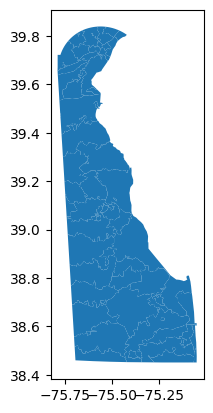

In [503]:
gdf.plot()

In [516]:
gdf_barrier_zip_joined_geoms = gpd.GeoDataFrame(df_barrier_zip_joined.join(gdf, how='right')).fillna(0)
display(gdf_barrier_zip_joined_geoms.head(), gdf_barrier_zip_joined_geoms.shape)

,Lack of childcare,Transportation challenges,Criminal history,Lack of trainings/skills set,Social emotional skills,Other_Age,Other_Current Employment Situation,Other_Lack of Education,Other_Lack of Experience,Other_Lack of Opportunities,...,Other_Lack of trainings/skills set,Other_Language/Migrant Status,Other_Location,Other_Misc.,Other_No Barriers,Other_Personal Barriers,Other_Social Barriers,Other_Social emotional skills,Other_Unsure,geometry
ZCTA5CE10,,,,,,,,,,,,,,,,,,,,,
19962,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-75.53140 39.05378, -75.53236 39.053..."
19936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-75.58837 39.22189, -75.58813 39.222..."
19720,2.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,"POLYGON ((-75.62946 39.68496, -75.62930 39.685..."
19806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-75.55876 39.74726, -75.55898 39.747..."
19804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-75.57044 39.72937, -75.56955 39.730..."


(68, 22)

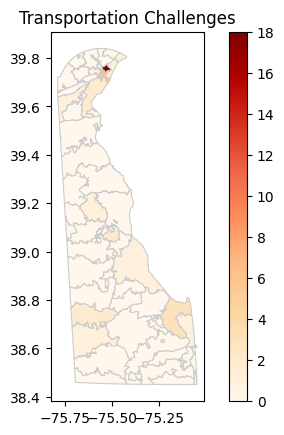

In [518]:
# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
gdf_barrier_zip_joined_geoms.plot(column='Transportation challenges', ax=ax, legend=True, cmap='OrRd', linewidth=0.8, edgecolor='0.8')
ax.set_title('Transportation Challenges')
plt.show()


In [ ]:
## Split by Wilmington/NC vs Non-Wilmington/NC